# Práctico

El trabajo práctico de la materia consiste en el análisis de un conjunto de datos extraído de Twitter. La idea es emplear los conceptos de grafos vistos en clase sobre un caso real de actualidad.

## Dataset

El dataset consiste en un conjunto de hilos de tweets, con un total de ~150000 tweets, extraídos entre Enero y Marzo de 2021. La temática de los mismos está referida a la vacunación contra el covid-19 en Argentina.

Pueden descargar el dataset del siguiente [link](https://drive.google.com/file/d/1X_qKsE8muAnom2tDX4sLlmBAO0Ikfe_G/view?usp=sharing).

### Campos

- **created_at:** Fecha del tweet
- **id_str:** ID del tweet
- **full_text:** Contenido del tweet
- **in_reply_to_status_id:** ID del tweet inmediatamente anterior en el hilo
- **in_reply_to_user_id:** Autor del tweet inmediatamente anterior en el hilo
- **user.id:** Autor del tweet
- **user_retweeters:** Lista de ID de usuarios que retweetearon el tweet
- **sentiment:** Etiquetado manual que indica el sentimiento o intención del tweet con respecto al tweet anterior en el hilo

## Configuración inicial

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')

## Descargar el csv con los datos en este directorio
#DATA_DIR = Path('../data/twitter')
#INPUT_FILE = DATA_DIR / 'vacunas.csv'

## Creamos el directorio en caso de que no exista
#DATA_DIR.mkdir(parents=True, exist_ok=True)

### Cargamos el dataset

In [195]:
dtypes = {
    'id_str': str,
    'full_text': str,
    'in_reply_to_status_id': str,
    'in_reply_to_user_id': str,
    'user.id': str
}
df = pd.read_csv('vacunas.csv', dtype=dtypes).dropna(subset=['user_retweeters'])
df['user_retweeters'] = df['user_retweeters'].apply(lambda x: [str(elem) for elem in eval(x)])
print(df.shape)
df.head()

(155123, 8)


,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,"[2258074658, 159909978, 105301854, 290671142, ...",NaN
1,Sat Feb 20 03:19:59 +0000 2021,1362965193509265417,@Clon_43 @norabar Nora estaba indignada porque...,1362962469749153792,2737379453,32718111,[],NaN
2,Mon Feb 22 23:55:08 +0000 2021,1364000806740111363,"Bueno, Alberto dijo Salud o Economía. La salud...",NaN,NaN,252168075,"[1238117630696972289, 37232479, 12792246571247...",NaN
3,Tue Feb 23 00:09:14 +0000 2021,1364004354374696963,@spitta1969 Tuit del mes Spitta,1364000806740111363,252168075,1156346340802224128,[],NaN
4,Tue Feb 23 00:00:17 +0000 2021,1364002100364128260,@spitta1969 Estas onfire,1364000806740111363,252168075,153663816,[],NaN


### Observamos algunos ejemplos

In [4]:
idx = 0
print('Texto:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Texto: Seguimos esperando el comunicado de @norabar repudiando la situación respecto del gobierno y el tema vacunas. Seamos pacientes que con esto de la pandemia anda con mucho "laburo".
Retweets: 9


In [5]:
idx = 376
print('Text:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Text: Todo lo que hay que entender sobre la decisión –o no– de poner más vacunas en más brazos (por ejemplo, usar las 1º dosis en muchos y si es necesario retrasar la 2º) está en esta excelente nota de Nora Bär. https://t.co/A0I03DyxgO
Retweets: 48


### Calculamos la cantidad de hilos

In [6]:
roots = df[df['in_reply_to_user_id'].isna()]
roots.shape

(3174, 8)

## Actividades

### Primera parte

#### **1. Construcción del grafo** 

Construir el **grafo de retweets**, definido de la siguiente manera:

- Tipo de grafo: Dirigido
- Nodos: ID de los usuarios
- Enlaces: (Usuario A) ---> (Usuario B) si B retweeteó algún tweet de A

Con estos datos, el grafo debería tener alrededor de 40000 nodos y 90000 enlaces.

Considerar la versión no dirigida del grafo y estudiar su conectividad. Si existe una única "componente gigante", realizar el resto de las actividades sobre ella, en lugar de sobre el grafo completo.

Calcular las siguientes métricas globales del grafo:

- Grado medio
- Asortatividad
- Transitividad
- Coeficiente de clustering de Watts-Strogatz

**Opcional:** Comparar las métricas calculadas anteriormente con las de un grafo aleatorio con la misma distribución de grado. Pueden utilizar para ello este [método](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html?highlight=configuration#networkx.generators.degree_seq.configuration_model). Con esto en mente, comentar si los valores obtenidos anteriormente difieren significativamente del caso aleatorio.


#### **2. Centralidad**

Calcular 5 métricas de centralidad de nodos. Graficar la distribución de cada una de ellas ¿Existe alguna correlación entre las distintas centralidades? 

Hacer un ranking con los 10 nodos más centrales para cada métrica. ¿Hay coincidencia entre los rankings?. ¿Qué características tienen los usuarios más centrales y sus respectivos tweets?

**Opcional:** Determinar si existe alguna correlación entre la centralidad de un nodo y su actividad en red social. Es decir, evaluar si los usuarios que más escriben son los más centrales o no.

#### **3. Comunidades**

Utilizar el algoritmo de Louvain con el parámetro "resolución" igual a 1. Caracterizar las comunidades halladas (cantidad, distribución de tamaños). Utilizar la modularidad y otras dos métricas a elección para evaluar la calidad de la partición encontrada. 

Variar el parámetro "resolución" y observar cómo cambia la distribución de comunidades encontradas. ¿Existe algún valor para el cual se identifiquen dos grandes comunidades?

Elegir otro algoritmo de detección de comunidades y comparar los resultados con los obtenidos anteriormente.

**Opcional:** Correr el algoritmo de Louvain con distintas semillas aleatorias. Utilizar alguna métrica de comparación externa entre las particiones obtenidas para determinar en qué medida depende el algoritmo de la condición inicial.

## Segunda parte

### **4. Extracción de etiquetas**

En el archivo [etiquetas.csv](https://drive.google.com/file/d/1LWY3VoIRt0xKwEbbtMXYePOGZvgPsQh-/view?usp=sharing) están las etiquetas para un pequeño subconjunto de nodos. Podemos interpretar el valor de la etiqueta como la pertenencia a una determinada clase, donde los usuarios de una misma clase en general tienden a expresar apoyo entre sí.

- Determinar quiénes son los usuarios referentes de cada clase (utilizar alguna medida de centralidad calculada sobre el grafo de retweets).
- Utiliando los resultados del práctico anterior, determinar si los usuarios de cada clase forman parte de distintas comunidades.

**Opcional:** Reconstruir el archivo "etiquetas.csv". Para eso, hacer lo siguiente

- Construir un grafo en donde los nodos sean usuarios, y donde los enlaces unan dos nodos si entre ellos hubo más respuestas de apoyo que de oposición.
- Extraer las dos componentes más grandes del grafo. Esos serán nuestros nodos etiquetados.

### **5. Embedding de nodos**

- Generar un embedding del grafo de retweets utilizando el algoritmo `word2vec`.
- Reducir a 2 la dimensionalidad del embedding utilizando [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) y [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).
- Graficar los embeddings correspondientes a los datos etiquetados. ¿Es posible diferenciar unos de otros?

**Opcional:** Graficar además los embeddings de los nodos que forman parte de las comunidades asociadas a cada clase. Determinar si el embedding permite distinguir cada comunidad.

### **Opcional: 6. Redes neuronales de grafos**

El archivo [word_vectors.csv](https://drive.google.com/file/d/1aoxugyMktKb0NQ8Pf3bdhKvh8BAj7YZz/view?usp=sharing) contiene un embedding de 300 dimensiones para cada tweet, otenido utilizando un modelo preentrenado de [FastText](https://fasttext.cc/). Construir una matriz de features para los nodos tomando, para cada usuario, el promedio de los vectores correspondientes a los tweets que escribió. Utilizando estos features, y tomando como ejemplos etiquetados los usuarios de "etiquetas.csv" entrenar una red neuronal de grafos para realizar una clasificación binaria sobre el resto de los nodos. Pueden utilizar como base el siguiente modelo:

In [6]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Embedding final
        
        # Aplicamos un clasificador lineal sobre el embedding
        out = self.classifier(h)

        return out, h

NameError: name 'torch' is not defined

**Observación:** para alimentar la red neuronal, es necesario construir un objeto de la clase `Dataset` de PyTorch-Geometric. Una forma de hacer eso es la siguiente

In [ ]:
from torch_geometric.data import InMemoryDataset, Data

## Reemplazar por el grafo correspondiente
g = nx.Graph()

## Etiquetas. Reemplazar por las clases del archivo 'etiquetas.csv'.
## Asignar la clase '2' a los ejemplos no etiquetados
labels = [1, 0, 2, ..., 1]

## True si el ejemplo está etiquetado (clases 0 y 1)
train_idx = [True, True, False, ..., True]

## Matriz de features (word vectors)
features = ...

adj = nx.to_scipy_sparse_matrix(g).tocoo()
row = torch.from_numpy(adj.row.astype(np.int64)).to(torch.long)
col = torch.from_numpy(adj.col.astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)


class TwitterDataset(InMemoryDataset):
    def __init__(self, transform=None):
        super(TwitterDataset, self).__init__('.', transform, None, None)

        data = Data(edge_index=edge_index)
        
        data.num_nodes = g.number_of_nodes()
        
        # Features 
        data.x = torch.from_numpy(features).type(torch.float32)
        
        # Etiquetas
        y = torch.from_numpy(labels).type(torch.long)
        data.y = y.clone().detach()
        
        data.num_classes = 2
        
        n_nodes = g.number_of_nodes()
        
        # create train and test masks for data
        train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        train_mask[train_idx] = True
        data['train_mask'] = train_mask

        self.data, self.slices = self.collate([data])

    def _download(self):
        return

    def _process(self):
        return

    def __repr__(self):
        return '{}()'.format(self.__class__.__name__)

## **Construcción del grafo**
Construir el grafo de retweets, definido de la siguiente manera:

Tipo de grafo: Dirigido  
Nodos: ID de los usuarios  
Enlaces: (Usuario A) ---> (Usuario B) si B retweeteó algún tweet de A


**Opcional:** Comparar las métricas calculadas anteriormente con las de un grafo aleatorio con la misma distribución de grado. Pueden utilizar para ello este [método](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html?highlight=configuration#networkx.generators.degree_seq.configuration_model). Con esto en mente, comentar si los valores obtenidos anteriormente difieren significativamente del caso aleatorio.



In [163]:
import networkx as nx
import numpy as np
G = nx.Graph()
DG = nx.DiGraph()

In [8]:
df_filter = df[['user.id', 'user_retweeters']]
df_graph = df_filter.explode('user_retweeters').reset_index(drop=True).dropna() # Con el dropeo de los no retweeteados da los valores sugeridos

In [164]:
G = nx.from_pandas_edgelist(df_graph, source='user.id', target='user_retweeters')
DG = nx.from_pandas_edgelist(df_graph, source='user.id', target='user_retweeters')

Es indistinto para el calculo de nodos y vertices seleccionar el grafo dirigido o el no dirigido

In [168]:
print(f'Cantidad de nodos: {DG.number_of_nodes()}')
print(f'Cantidad de links: {DG.number_of_edges()}')

Cantidad de nodos: 39800
Cantidad de links: 93404


Tomamos el subgrafo componente mas grande del grafo no dirigido.

In [11]:
graph_components = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
G_s = S[0]

In [12]:
print(f'Cantidad de nodos: {G_s.number_of_nodes()}')
print(f'Cantidad de links: {G_s.number_of_edges()}')

Cantidad de nodos: 38998
Cantidad de links: 92830


In [13]:
df_nodes = pd.DataFrame(index=list(G_s.nodes()))
deg_seq = np.array([k for v, k in G_s.degree()])
clustering_coefficient = nx.clustering(G_s)

df_nodes['degree'] = deg_seq
df_nodes['Cws'] = list(clustering_coefficient.values())

In [14]:
df_nodes = df_nodes.sort_values(by=["degree"], ascending=False)\
            .reset_index().rename(columns={"index" : "user.id"})

### Calculo metricas Globales

Calculamos metricas sobre el subgrafo obtenido anteriormente.

**Grado Medio**

In [170]:
print(f"El grado medio del Subgrafo global considerado es: {round(df_nodes.degree.mean(),2)} ~ {round(df_nodes.degree.mean())}")

El grado medio del Subgrafo global considerado es: 4.76 ~ 5


**Asortatividad**

In [171]:
dac = nx.degree_assortativity_coefficient(G_s)
print(f"Las medidas de similidaridad de las conexiones entre nodos de igual grado es: {round(dac,3)}")

Las medidas de similidaridad de las conexiones entre nodos de igual grado es: -0.223


**Transitividad**

In [172]:
transitivity = nx.transitivity(G_s)
print(f"La transitividad el grafo es: {round(transitivity,5)}")

La transitividad el grafo es: 0.00161


**Coeficiente medio de Clustering  de Watts-Strogatz**

In [173]:
print(f"El coeficiente de clustering de Watts-Strogatz es : {round(df_nodes.Cws.mean(),3)}")

El coeficiente de clustering de Watts-Strogatz es : 0.102


### Conclusiones(FALTA)

### Opcional(FALTA)

## **Centralidad**

Opcional: Determinar si existe alguna correlación entre la centralidad de un nodo y su actividad en red social. Es decir, evaluar si los usuarios que más escriben son los más centrales o no.

In [212]:
import igraph as ig

In [213]:
G_m = ig.Graph.from_networkx(G_s)

In [214]:
print(f'Cantidad de nodos: {G_m.vcount()}')
print(f'Cantidad de links: {G_m.ecount()}')

Cantidad de nodos: 38998
Cantidad de links: 92830


In [215]:
betweenness = G_m.betweenness()
eigenvector = G_m.eigenvector_centrality()
closeness = G_m.closeness()
pagerank = G_m.pagerank()
#katz = nx.katz_centrality(G)

In [216]:
df_nodes['betweenness'] = betweenness
df_nodes['eigenvector'] = eigenvector
df_nodes['closeness'] = closeness
df_nodes['pagerank'] = pagerank
#katz = nx.katz_centrality(G)

df_nodes.head(10)

,user.id,degree,Cws,betweenness,eigenvector,closeness,pagerank
0,252168075,8207,0.000558,78111.640852,0.000748,0.244898,0.000039
1,130979339,5553,0.000336,130535.561685,0.009091,0.286305,0.000071
2,73102744,5362,0.000496,0.000000,0.000007,0.196722,0.000008
3,367933714,3849,0.000882,31376.713412,0.010696,0.304398,0.000037
4,593189095,3834,0.000068,291383.100735,0.011937,0.308014,0.000057
5,2687724840,3175,0.000750,0.000000,0.000007,0.196722,0.000008
6,931564592328781824,3136,0.000581,22191.084223,0.010886,0.304296,0.000031
7,144929758,2657,0.000324,9600.249311,0.007731,0.281864,0.000028
8,312708081,1630,0.001669,153925.112534,0.012812,0.318817,0.000081
9,1077176953,589,0.001628,29292.427046,0.011608,0.304716,0.000055


### Correlacion Medidas de Centralidad

<AxesSubplot:>

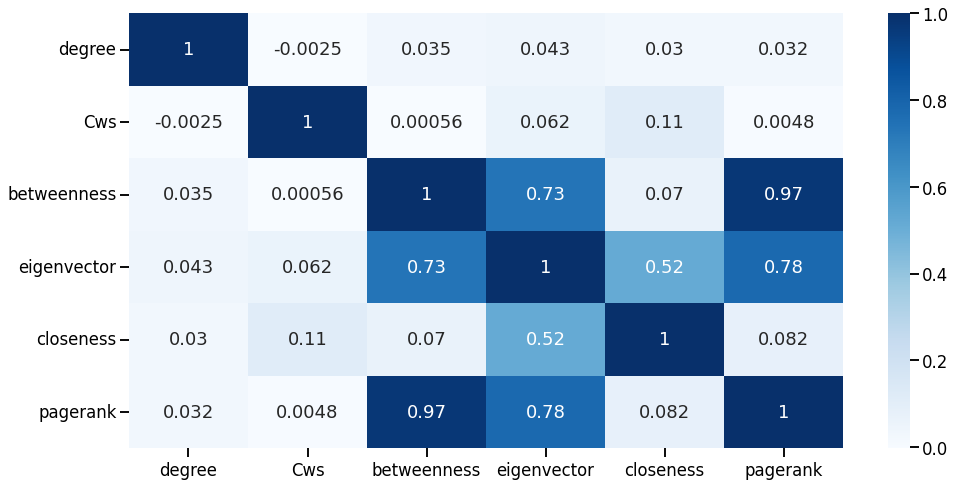

In [217]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_nodes.corr(), annot=True, cmap= 'Blues', ax=ax)

### Betweenness

Distribucion de la medida de Betwenneess en los nodos.

(array([3.899e+04, 0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 2.70336415e+07, 5.40672831e+07, 8.11009246e+07,
        1.08134566e+08, 1.35168208e+08, 1.62201849e+08, 1.89235491e+08,
        2.16269132e+08, 2.43302774e+08, 2.70336415e+08]),
 <BarContainer object of 10 artists>)

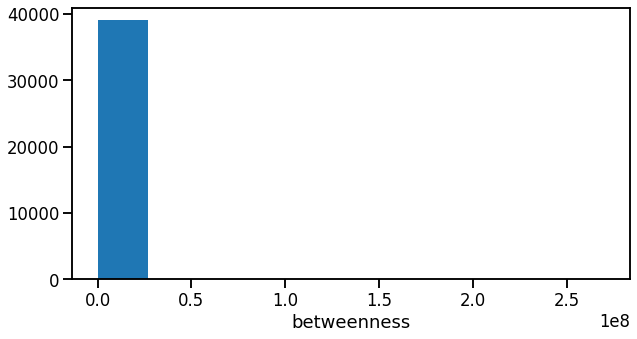

In [218]:
fig, ax= plt.subplots(figsize=(10,5))
ax.set_xlabel('betweenness')
ax.hist(df_nodes['betweenness'])

**Top 10 medida de Betweenness**

In [219]:
df_nodes.sort_values(by=["betweenness"], ascending=False).head(10)

,user.id,degree,Cws,betweenness,eigenvector,closeness,pagerank
10,152325528,567,0.000667,2.703364e+08,0.738339,0.392229,0.041559
343,60982903,49,0.046769,1.785181e+08,1.000000,0.398115,0.033869
87,992420860907663361,109,0.037377,1.259533e+08,0.972362,0.371290,0.031500
1338,2828897977,18,0.267974,1.139237e+08,0.361535,0.349051,0.029741
736,1674504272,29,0.071429,9.875625e+07,0.262567,0.375875,0.015305
276,2645904638,55,0.071380,9.179453e+07,0.715609,0.382177,0.022418
545,2229279600,38,0.102418,7.542586e+07,0.500054,0.366155,0.019766
1019,153552401,23,0.067194,7.064363e+07,0.321722,0.342205,0.016846
571,3109545658,36,0.042857,2.702409e+07,0.341865,0.353775,0.008637
3809,1345902409692930048,7,0.047619,1.804990e+07,0.053433,0.388409,0.002249


### Eigenvector

Distiribucion centralidad de vector propio, en los nodos.

(array([3.8989e+04, 0.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([3.75555036e-11, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

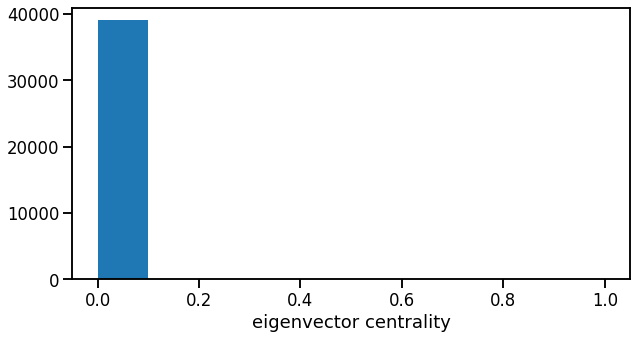

In [220]:
fig, ax= plt.subplots(figsize=(10,5))
ax.set_xlabel('eigenvector centrality')
ax.hist(df_nodes['eigenvector'])

**Top 10 medida de Centralidad de Vector Propio**

In [221]:
df_nodes.sort_values(by=["eigenvector"], ascending=False).head(10)

,user.id,degree,Cws,betweenness,eigenvector,closeness,pagerank
343,60982903,49,0.046769,1.785181e+08,1.000000,0.398115,0.033869
87,992420860907663361,109,0.037377,1.259533e+08,0.972362,0.371290,0.031500
10,152325528,567,0.000667,2.703364e+08,0.738339,0.392229,0.041559
276,2645904638,55,0.071380,9.179453e+07,0.715609,0.382177,0.022418
545,2229279600,38,0.102418,7.542586e+07,0.500054,0.366155,0.019766
1338,2828897977,18,0.267974,1.139237e+08,0.361535,0.349051,0.029741
571,3109545658,36,0.042857,2.702409e+07,0.341865,0.353775,0.008637
1019,153552401,23,0.067194,7.064363e+07,0.321722,0.342205,0.016846
736,1674504272,29,0.071429,9.875625e+07,0.262567,0.375875,0.015305
267,284311261,57,0.087093,1.417075e+06,0.091112,0.336474,0.001208


### Closeness

Distribucion de medida de cercania en los nodos

(array([1.000e+00, 1.000e+01, 1.300e+01, 1.200e+01, 5.000e+00, 2.700e+01,
        5.500e+01, 2.300e+01, 4.300e+01, 1.410e+02, 6.300e+01, 2.470e+02,
        2.950e+02, 2.970e+02, 4.910e+02, 5.830e+02, 5.770e+02, 1.045e+03,
        8.820e+02, 1.253e+03, 1.497e+03, 1.050e+03, 9.460e+02, 4.707e+03,
        8.510e+02, 1.872e+03, 3.781e+03, 2.043e+03, 8.755e+03, 8.310e+02,
        8.230e+02, 8.640e+02, 2.163e+03, 6.780e+02, 5.920e+02, 4.420e+02,
        3.020e+02, 2.670e+02, 1.870e+02, 8.800e+01, 9.600e+01, 2.800e+01,
        2.200e+01, 1.600e+01, 1.800e+01, 4.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 5.000e+00]),
 array([0.13040687, 0.13576104, 0.14111521, 0.14646938, 0.15182355,
        0.15717772, 0.1625319 , 0.16788607, 0.17324024, 0.17859441,
        0.18394858, 0.18930275, 0.19465693, 0.2000111 , 0.20536527,
        0.21071944, 0.21607361, 0.22142778, 0.22678195, 0.23213613,
        0.2374903 , 0.24284447, 0.24819864, 0.25355281, 0.25890698,
        0.26426115, 0.26961533, 0.27

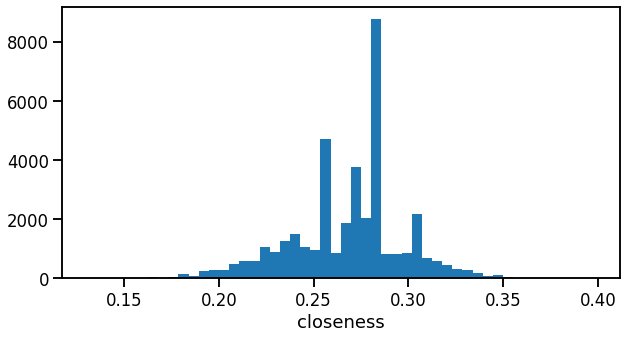

In [222]:
fig, ax= plt.subplots(figsize=(10,5))
ax.set_xlabel('closeness')
ax.hist(df_nodes['closeness'], 50)

**Top 10 medida de cercania**

In [223]:
df_nodes.sort_values(by=["closeness"], ascending=False).head(10)

,user.id,degree,Cws,betweenness,eigenvector,closeness,pagerank
343,60982903,49,0.046769,1.785181e+08,1.000000,0.398115,0.033869
1344,3388495833,18,0.117647,5.757763e+06,0.048239,0.397693,0.000187
1766,723689256938541057,14,0.208791,4.296021e+06,0.044047,0.397203,0.000047
380,1189293417353887744,47,0.039778,4.822057e+06,0.046644,0.395664,0.000044
11351,169736965,2,0.000000,3.502980e+06,0.035681,0.394395,0.000059
10,152325528,567,0.000667,2.703364e+08,0.738339,0.392229,0.041559
3809,1345902409692930048,7,0.047619,1.804990e+07,0.053433,0.388409,0.002249
1349,1321576572760064000,18,0.098039,3.186130e+06,0.038214,0.387109,0.000033
1136,174416954,20,0.073684,6.642837e+06,0.039285,0.382545,0.000231
276,2645904638,55,0.071380,9.179453e+07,0.715609,0.382177,0.022418


### Page Rank

Distribucion de medida de page rank en los nodos.

(array([3.8989e+04, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([6.40294918e-06, 4.16168943e-03, 8.31697590e-03, 1.24722624e-02,
        1.66275489e-02, 2.07828353e-02, 2.49381218e-02, 2.90934083e-02,
        3.32486948e-02, 3.74039812e-02, 4.15592677e-02]),
 <BarContainer object of 10 artists>)

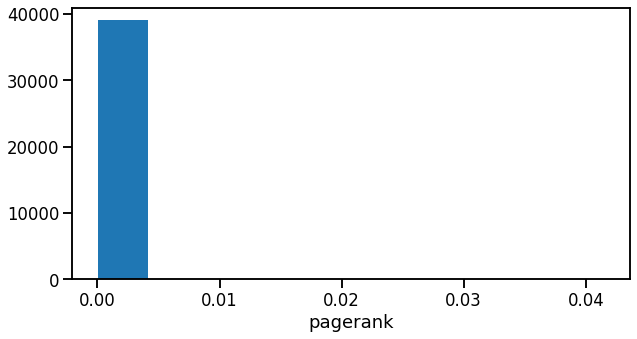

In [224]:
fig, ax= plt.subplots(figsize=(10,5))
ax.set_xlabel('pagerank')
ax.hist(df_nodes['pagerank'])

**Top 10 medida de Page Rank**

In [225]:
df_nodes.sort_values(by=["pagerank"], ascending=False).head(10)

,user.id,degree,Cws,betweenness,eigenvector,closeness,pagerank
10,152325528,567,0.000667,2.703364e+08,0.738339,0.392229,0.041559
343,60982903,49,0.046769,1.785181e+08,1.000000,0.398115,0.033869
87,992420860907663361,109,0.037377,1.259533e+08,0.972362,0.371290,0.031500
1338,2828897977,18,0.267974,1.139237e+08,0.361535,0.349051,0.029741
276,2645904638,55,0.071380,9.179453e+07,0.715609,0.382177,0.022418
545,2229279600,38,0.102418,7.542586e+07,0.500054,0.366155,0.019766
1019,153552401,23,0.067194,7.064363e+07,0.321722,0.342205,0.016846
736,1674504272,29,0.071429,9.875625e+07,0.262567,0.375875,0.015305
571,3109545658,36,0.042857,2.702409e+07,0.341865,0.353775,0.008637
3171,1215983722698366977,8,0.000000,1.307567e+07,0.082660,0.331810,0.003662


### Caracteristicas usuarios mas centrales (FALTA)

**Usuario 152325528**

In [207]:
df[df["user.id"] == "60982903"]

,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment


### Conclusiones(FALTA)

### Opcional(FALTA)


## **Comunidades**

**Opcional:** Correr el algoritmo de Louvain con distintas semillas aleatorias. Utilizar alguna métrica de comparación externa entre las particiones obtenidas para determinar en qué medida depende el algoritmo de la condición inicial.

In [28]:
from cdlib import NodeClustering, evaluation, algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'karateclub', 'graph_tool', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


### Louvian

Aplicamos el algoritmo de Louvian al grafo a los fines de poder caracterizar distintas comunidades, empleando una resolucion igual a 1.

In [29]:
comms = algorithms.louvain(G_s, weight='weight', resolution=1, randomize=False)

In [30]:
print(f"{comms.method_name}")
print(f"Parametros del algoritmo : {comms.method_parameters}")
print(f"Numero de comunidades detectadas : {len(comms.communities)}")

Louvain
Parametros del algoritmo : {'weight': 'weight', 'resolution': 1, 'randomize': False}
Numero de comunidades detectadas : 38


Caracterizamos el tamaño de las distintas comunidades.

In [31]:
communities = {}
for com in range(len(comms.communities)):
    communities[com] = len(comms.communities[com])
df_comms = pd.DataFrame(communities.items(), columns=['Community', 'Size']).sort_values(by=['Size'], ascending=False)
df_comms

,Community,Size
0,0,8152
1,1,8109
2,2,6388
3,3,4824
4,4,3393
5,5,3144
6,6,2838
7,7,658
8,8,239
9,9,213


#### Metricas de Evaluacion Interna algoritmo de Louvian

**Modularidad**

In [32]:
evaluation.newman_girvan_modularity(G_s, comms)

FitnessResult(min=None, max=None, score=0.5596727455395557, std=None)

**Indice de corte**

In [33]:
evaluation.cut_ratio(G_s, comms)

FitnessResult(min=1.1162009876146339e-06, max=6.304380000390786e-05, score=2.0442723987257093e-05, std=1.4627081516585153e-05)

**Densidad Interna**

In [34]:
evaluation.internal_edge_density(G_s, comms)

FitnessResult(min=0.0003967141694262149, max=0.5, score=0.12656787355870108, std=0.14332507662162508)

##### Comparacion distintas resoluciones

In [73]:
data = []
resolutions = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for resolution in resolutions:
    comms = algorithms.louvain(G_s, weight='weight', resolution=resolution, randomize=False)
    ncomms = len(comms.communities)
    Q = evaluation.newman_girvan_modularity(G_s, comms).score
    mu = evaluation.internal_edge_density(G_s, comms).score
    cut_ratio = evaluation.cut_ratio(G_s, comms).score
    data.append((resolution, ncomms, Q, mu, cut_ratio))

df_Louvian = pd.DataFrame(data, columns=['Resolucion', 'Numero de Comunidades', 'Modularidad', 'Densida Interna', 'Indice de Corte'])

In [74]:
df_Louvian

,Resolucion,Numero de Comunidades,Modularidad,Densida Interna,Indice de Corte
0,0.01,4919,0.358683,0.645931,0.000129
1,0.05,4388,0.365980,0.677718,0.000119
2,0.10,4387,0.365961,0.677551,0.000119
3,0.50,4390,0.365928,0.678008,0.000119
4,1.00,38,0.559673,0.126568,0.000020
5,5.00,202,0.446977,0.062785,0.000082
6,10.00,485,0.434141,0.230569,0.000081
7,50.00,15601,0.262029,0.018026,0.000081
8,100.00,18593,0.225329,0.025530,0.000088


No se identifica un valor de resolucion con el cual sea posible obtener dos grandes comunidades con el algoritmo en cuestion.

### Label-propagation

In [105]:
comms_LP = algorithms.label_propagation(G_s)
Q_LP = evaluation.newman_girvan_modularity(G_s, comms_LP).score
mu_LP = evaluation.internal_edge_density(G_s, comms_LP).score
cut_ratio_LP = evaluation.cut_ratio(G_s, comms_LP).score

In [106]:
print(f"{comms_LP.method_name}")
print(f"Parametros del algoritmo : {comms_LP.method_parameters}")
print(f"Numero de comunidades detectadas : {len(comms_LP.communities)}")
print(f"Modularidad : {Q_LP}")
print(f"Densidad Interna : {mu_LP}")
print(f"Indice de corte : {cut_ratio_LP}")

Label Propagation
Parametros del algoritmo : {'': ''}
Numero de comunidades detectadas : 717
Modularidad : 0.5354032373930844
Densidad Interna : 0.7338906597765368
Indice de corte : 2.1321666199340195e-05


### Leiden

In [102]:
comms_Leiden = algorithms.leiden(G_s)
Q_Leiden = evaluation.newman_girvan_modularity(G_s, comms_Leiden).score
mu_Leiden = evaluation.internal_edge_density(G_s, comms_Leiden).score
cut_ratio_Leiden = evaluation.cut_ratio(G_s, comms_Leiden).score

In [103]:
print(f"{comms_Leiden.method_name}")
print(f"Parametros del algoritmo : {comms_Leiden.method_parameters}")
print(f"Numero de comunidades detectadas : {len(comms_Leiden.communities)}")
print(f"Modularidad : {Q_Leiden}")
print(f"Densidad interna : {mu_Leiden}")
print(f"Indice de corte : {cut_ratio_Leiden}")

Leiden
Parametros del algoritmo : {'initial_membership': None, 'weights': None}
Numero de comunidades detectadas : 80
Modularidad : 0.5825253739555054
Densidad interna : 0.3641286278974517
Indice de corte : 1.60541055577104e-05


### Comparacion Metricas de Evaluacion Interna distintos algoritmos (REVISAR)

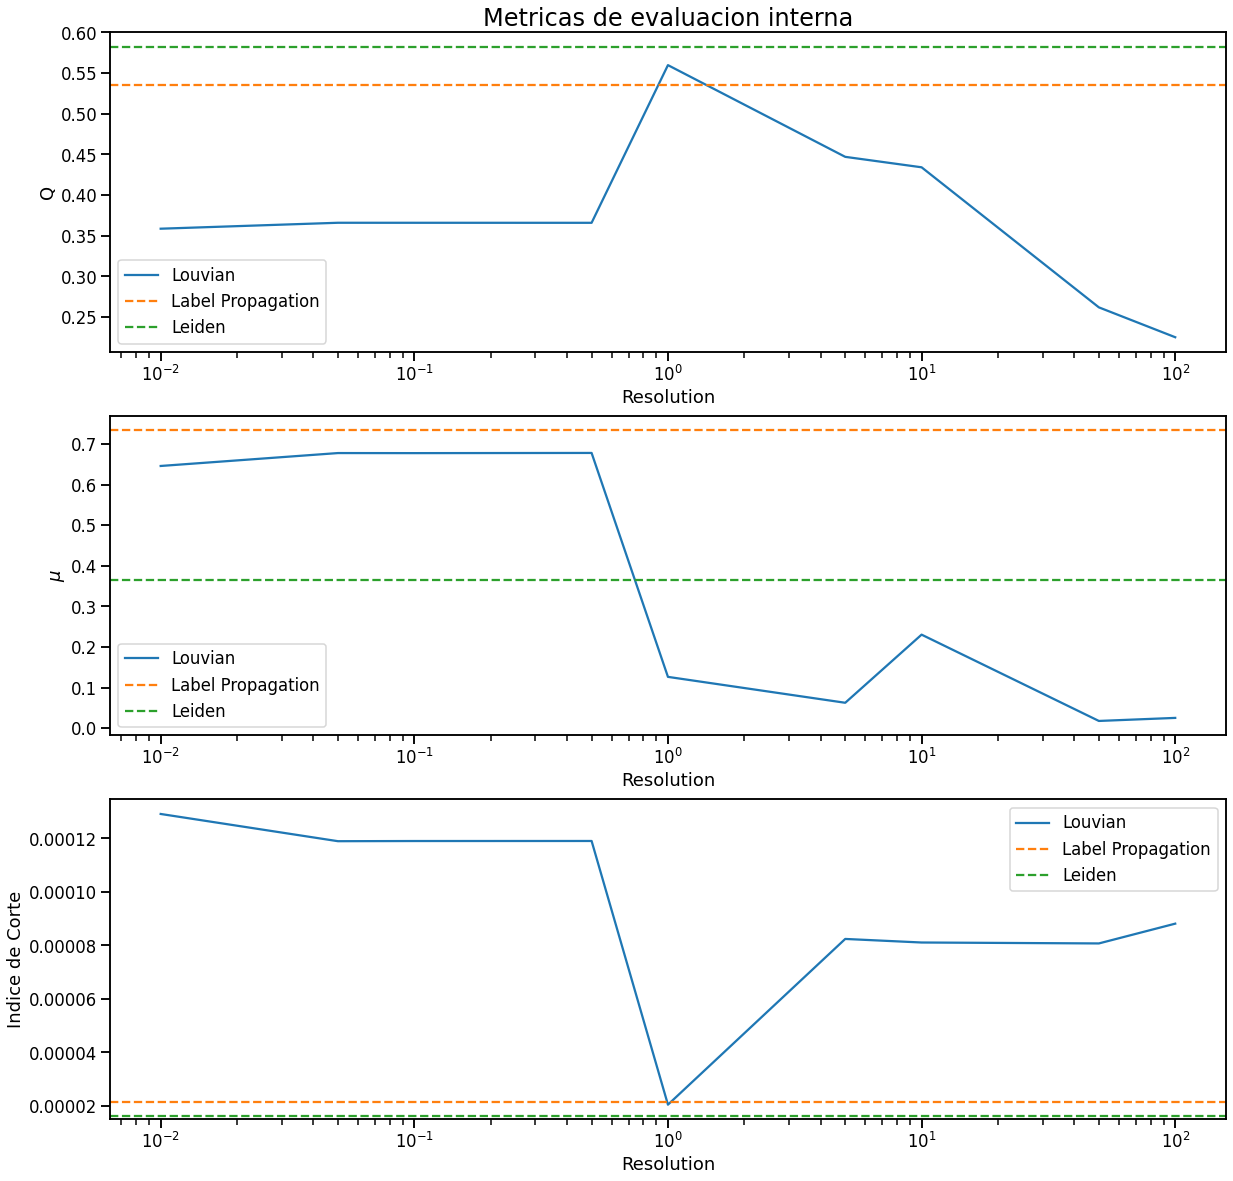

In [112]:
#Grafico para comparar metricas de evaluacion interna
fig, ((ax1, ax2, ax3)) = plt.subplots(3,1, figsize=(20,20))
ax1.set_title("Metricas de evaluacion interna", fontsize=24)
ax1.set_ylabel('Q')
ax1.set_xlabel('Resolution')
ax1.set_xscale('log')
ax1.plot(df_Louvian.Resolucion, df_Louvian.Modularidad, label = 'Louvian')
ax1.axhline(Q_LP, linestyle='--', label='Label Propagation', color='C1')
ax1.axhline(Q_Leiden, linestyle='--', label='Leiden', color='C2')
ax1.legend()

ax2.set_ylabel('$\mu$')
ax2.set_xlabel('Resolution')
ax2.set_xscale('log')
ax2.plot(df_Louvian.Resolucion, df_Louvian["Densida Interna"], label='Louvian')
ax2.axhline(mu_LP, linestyle='--', label='Label Propagation', color='C1')
ax2.axhline(mu_Leiden, linestyle='--', label='Leiden', color='C2')
ax2.legend()

ax3.set_ylabel('Indice de Corte')
ax3.set_xlabel('Resolution')
ax3.set_xscale('log')
ax3.plot(df_Louvian.Resolucion, df_Louvian["Indice de Corte"], label='Louvian')
ax3.axhline(cut_ratio_LP, linestyle='--', label='Label Propagation', color='C1')
ax3.axhline(cut_ratio_Leiden, linestyle='--', label='Leiden', color='C2')
ax3.legend()

Habria que elegir una resolucion del Algoritmo de Louvian para poder comparar el numero de comunidades. 

### Conclusiones(FALTA)

### Opcional(FALTA)